In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib.patches import Patch

In [44]:
dfAccident = pd.read_csv('Resources/MoonAccidents.csv')
dfAccident.head()

,Unnamed: 0,Accident_Severity,Number_of_Casualties,Date,Time,Phase
0,0,Serious,1.0,04-01-2005,17:42,Third Quarter
1,1,Light,1.0,04-01-2005,12:30,Third Quarter
2,2,Light,1.0,04-01-2005,09:28,Third Quarter
3,3,Light,1.0,04-01-2005,18:48,Third Quarter
4,4,Light,1.0,04-01-2005,15:45,Third Quarter


In [45]:
dfAccident = dfAccident[['Accident_Severity', 'Number_of_Casualties', 'Date', 'Time', 'Phase']]
dfAccident.head()

,Accident_Severity,Number_of_Casualties,Date,Time,Phase
0,Serious,1.0,04-01-2005,17:42,Third Quarter
1,Light,1.0,04-01-2005,12:30,Third Quarter
2,Light,1.0,04-01-2005,09:28,Third Quarter
3,Light,1.0,04-01-2005,18:48,Third Quarter
4,Light,1.0,04-01-2005,15:45,Third Quarter


In [43]:
dfAccident.to_csv('Resources/MoonAccidents.csv')

In [46]:
test = dfAccident
test = test.groupby(['Accident_Severity'])

test.count().head()

,Number_of_Casualties,Date,Time,Phase
Accident_Severity,,,,
Fatal,9320,9320,9318,9320
Light,616948,616948,616893,616948
Serious,98382,98382,98370,98382


In [52]:
dfAccident['Year'] = ''

for index, row in dfAccident.iterrows():
    date = row['Date']
    year = date.split('-')[2]
    dfAccident.at[index, 'Year'] = year

dfAccident.head()

,Accident_Severity,Number_of_Casualties,Date,Time,Phase,Year
0,Serious,1.0,04-01-2005,17:42,Third Quarter,2005
1,Light,1.0,04-01-2005,12:30,Third Quarter,2005
2,Light,1.0,04-01-2005,09:28,Third Quarter,2005
3,Light,1.0,04-01-2005,18:48,Third Quarter,2005
4,Light,1.0,04-01-2005,15:45,Third Quarter,2005


In [34]:
dfAccident['Accident_Severity'].unique()

array(['Serious', 'Light', 'Fatal'], dtype=object)

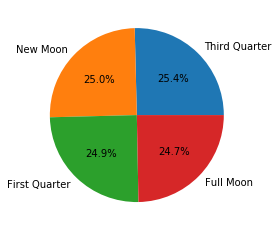

In [93]:
gPhases = dfAccident.groupby('Phase')

plt.pie(dfAccident['Phase'].value_counts(), labels = dfAccident['Phase'].unique(), autopct='%1.1f%%')
plt.show()

In [49]:
dfAccident['Phase'].value_counts()

First Quarter    183997
New Moon         181280
Full Moon        180394
Third Quarter    178979
Name: Phase, dtype: int64

In [51]:
dfAccident.head()

,Accident_Severity,Number_of_Casualties,Date,Time,Phase
0,Serious,1.0,04-01-2005,17:42,Third Quarter
1,Light,1.0,04-01-2005,12:30,Third Quarter
2,Light,1.0,04-01-2005,09:28,Third Quarter
3,Light,1.0,04-01-2005,18:48,Third Quarter
4,Light,1.0,04-01-2005,15:45,Third Quarter


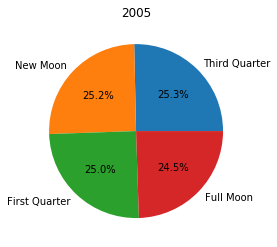

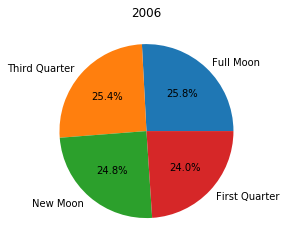

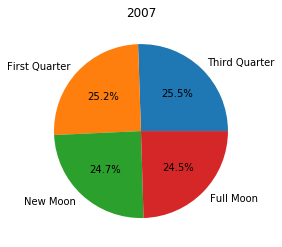

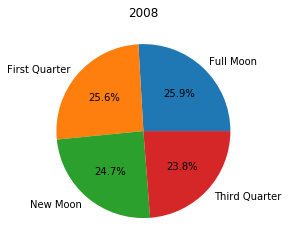

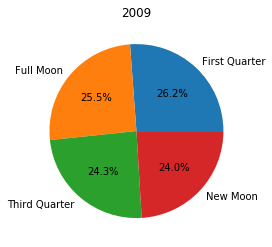

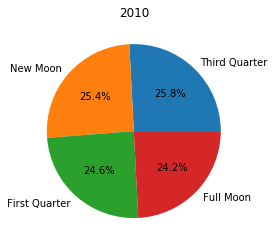

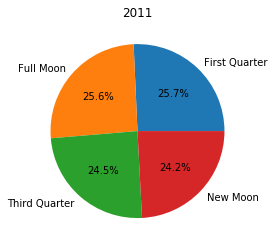

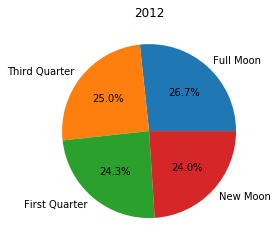

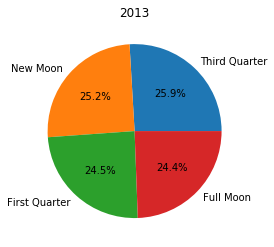

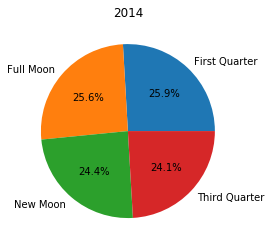

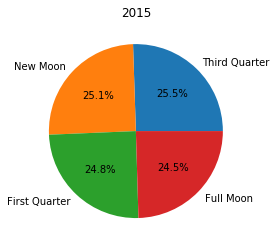

In [53]:
years = dfAccident['Year'].unique()

for year in years:
    dfYear = dfAccident.query('Year == @year')
    plt.pie(dfYear['Phase'].value_counts(), labels = dfYear['Phase'].unique(), autopct='%1.1f%%')
    plt.title(year)
    plt.show()
    


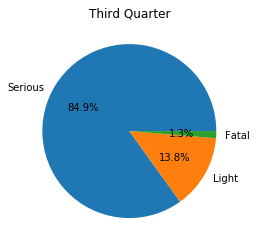

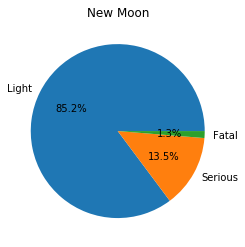

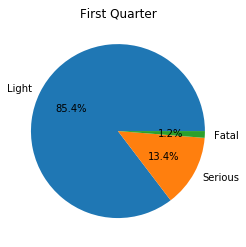

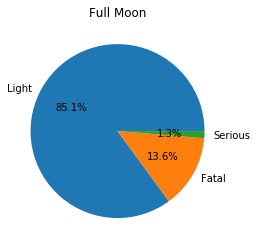

In [54]:
phases = dfAccident['Phase'].unique()

for phase in phases:
    dfPhase = dfAccident.query('Phase == @phase')
    plt.pie(dfPhase['Accident_Severity'].value_counts(), labels = dfPhase['Accident_Severity'].unique(), autopct='%1.1f%%')
    plt.title(phase)
    plt.show()

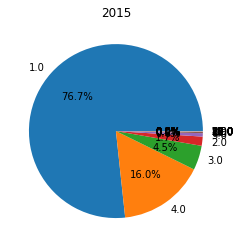

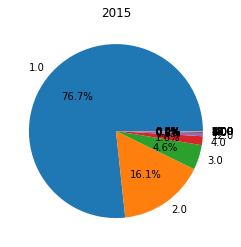

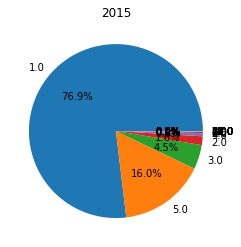

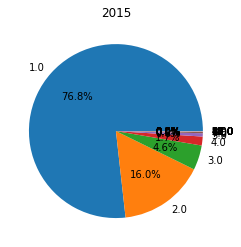

In [55]:
phases = dfAccident['Phase'].unique()

for phase in phases:
    dfPhase = dfAccident.query('Phase == @phase')
    plt.pie(dfPhase['Number_of_Casualties'].value_counts(), labels = dfPhase['Number_of_Casualties'].unique(), autopct='%1.1f%%')
    plt.title(year)
    plt.show()

First Quarter    20620
Full Moon        20034
New Moon         20434
Third Quarter    20733
Name: Phase, dtype: int64
First Quarter    19688
Full Moon        18915
New Moon         19350
Third Quarter    18255
Name: Phase, dtype: int64
First Quarter    18245
Full Moon        18996
New Moon         18733
Third Quarter    18406
Name: Phase, dtype: int64
First Quarter    18175
Full Moon        16849
New Moon         18371
Third Quarter    17493
Name: Phase, dtype: int64
First Quarter    17202
Full Moon        16742
New Moon         15797
Third Quarter    15978
Name: Phase, dtype: int64
First Quarter    15157
Full Moon        15923
New Moon         14906
Third Quarter    15685
Name: Phase, dtype: int64
First Quarter    16028
Full Moon        15280
New Moon         15975
Third Quarter    15066
Name: Phase, dtype: int64
First Quarter    15726
Full Moon        14122
New Moon         14322
Third Quarter    14741
Name: Phase, dtype: int64
First Quarter    13517
Full Moon        13494
New Moon  

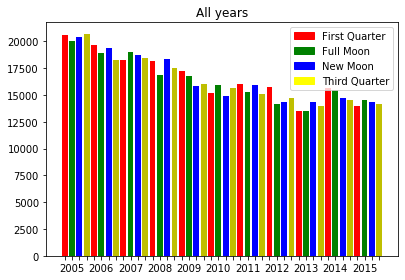

In [92]:
labels = []
for year in years:
    dfYear = dfAccident.query('Year == @year')
    phaseCounts = dfYear['Phase'].value_counts().sort_index()
    phaseOrder = dfYear['Phase'].unique()
    plt.bar(height = phaseCounts, x = (phaseOrder + year), color = ['r', 'g', 'b', 'y'])
    labels.append('')
    labels.append(year)
    labels.append('')
    labels.append('')

legend_elements = [Patch(facecolor='red', edgecolor='red',label='First Quarter'),
                   Patch(facecolor='green', edgecolor='green',label='Full Moon'),
                   Patch(facecolor='blue', edgecolor='blue',label='New Moon'),
                   Patch(facecolor='yellow', edgecolor='yellow',label='Third Quarter')]
    
plt.legend(handles = legend_elements)
test = range(len(years) *4)
plt.title('All years')
plt.tight_layout()
plt.xticks(test, labels = labels)
plt.show()

In [89]:
test2 = dfYear['Phase'].value_counts()
test2.sort_values()

First Quarter    13994
Third Quarter    14156
New Moon         14352
Full Moon        14562
Name: Phase, dtype: int64

In [ ]:
dfAccident['Time Compare'] = 0.0
dfAccident['Hour'] = 0
dfAccident = dfAccident.dropna()
for index, row in dfAccident.iterrows():
    try:
        time = row['Time']
        hour = time.split(':')[0]
        dfAccident.at[index, 'Hour'] = hour
        minute = time.split(':')[1]
        minutePercent = float(float(minute)/60.0)
        timePercent = float(hour) + minutePercent
        dfAccident.at[index, 'Time Compare'] = timePercent
    except:
        print(row['Time'])
        print(type(row['Time']))

In [ ]:
dfAccident.head()

In [63]:
dfAccident['Time Compare'] = round(dfAccident['Time Compare'], 2)
dfAccident.head()

C:\Users\caroj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Accident_Severity,Number_of_Casualties,Date,Time,Phase,Year,Time Compare
0,Serious,1.0,04-01-2005,17:42,Third Quarter,2005,17.70
1,Light,1.0,04-01-2005,12:30,Third Quarter,2005,12.50
2,Light,1.0,04-01-2005,09:28,Third Quarter,2005,9.47
3,Light,1.0,04-01-2005,18:48,Third Quarter,2005,18.80
4,Light,1.0,04-01-2005,15:45,Third Quarter,2005,15.75


In [67]:
dfAccident['Time Compare'].value_counts()

17.00    7076
17.50    6675
18.00    6383
15.50    6371
16.00    6339
         ... 
5.02       21
4.07       21
4.52       20
4.57       20
4.85       15
Name: Time Compare, Length: 1439, dtype: int64

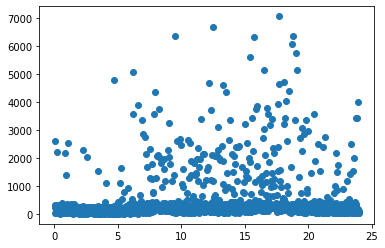

In [68]:
plt.scatter(dfAccident['Time Compare'].unique(), dfAccident['Time Compare'].value_counts())
plt.show()

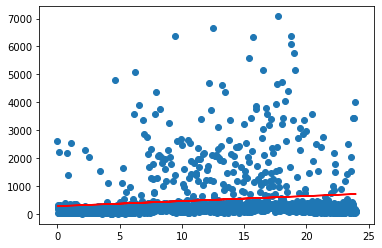

r value: 0.14009391059640686


In [71]:
times = dfAccident['Time Compare'].unique()
counts = dfAccident['Time Compare'].value_counts()
slope, intr, r, p, stderr = stats.linregress(times, counts)

y = slope * times + intr

plt.plot(times, y, color= 'r')
plt.scatter(times, counts)
plt.show()
print(f'r value: {r}')